In [1]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager 

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url) 

In [4]:
import datetime as datetime
import pandas as pd
df = pd.read_html(url) 
df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [5]:
mars_temp=df[0] 
mars_temp

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [6]:
mars_temp.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [7]:
mars_temp['terrestrial_date']=pd.to_datetime(mars_temp['terrestrial_date'])

In [8]:
mars_temp.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [9]:
mars_temp

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [10]:
mars_temp['min_temp']=mars_temp['min_temp'].astype(int)

In [11]:
mars_temp['pressure']=mars_temp['pressure'].astype(int)

In [12]:
mars_temp.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                     int64
pressure                     int64
dtype: object

In [13]:
mars_temp

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75,739
1,13,2012-08-17,11,156,6,-76,740
2,24,2012-08-18,12,156,6,-76,741
3,35,2012-08-19,13,157,6,-74,732
4,46,2012-08-20,14,157,6,-74,740
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78,730
1863,1892,2018-02-24,1974,134,5,-77,729
1864,1894,2018-02-25,1975,134,5,-76,729
1865,1893,2018-02-26,1976,135,5,-77,728


In [18]:
# Questions 
1) There are 12 months on Mars 
2) 1977 Martian days worth of data  

Text(0, 0.5, 'Min_Temp')

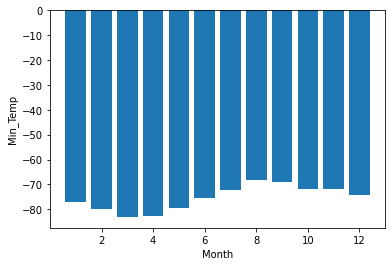

In [19]:
# Question 3
import matplotlib.pyplot as plt
month=mars_temp.groupby('month')
min_month=month['min_temp'].mean() 
x_axis=[1,2,3,4,5,6,7,8,9,10,11,12]
y_axis=min_month
plt.bar(x_axis, y_axis)
plt.xlabel('Month') 
plt.ylabel('Min_Temp') 

Month 3 has the lowest temperature while month 8 has the highest temperature

Text(0, 0.5, 'Pressure')

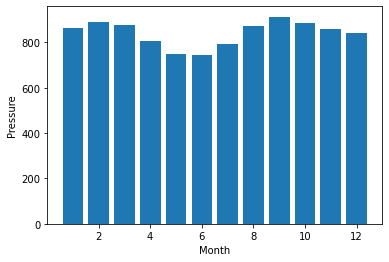

In [20]:
# Question 4 
min_pressure=month['pressure'].mean() 
x_axis=[1,2,3,4,5,6,7,8,9,10,11,12]
y_axis=min_pressure
plt.bar(x_axis, y_axis)
plt.xlabel('Month') 
plt.ylabel('Pressure')  

Month 6 has the lowest pressure while month 9 has the highest pressure

Text(0, 0.5, 'Count of Min Temp')

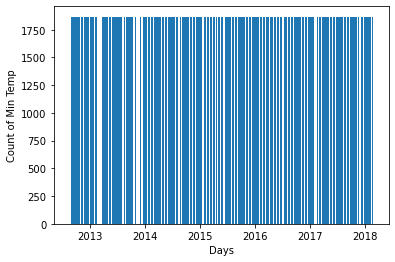

In [21]:
# Question 5 
earth_day=mars_temp.groupby('terrestrial_date').all()
x_value=earth_day.index

min_temp_all=earth_day['min_temp'].count()
y_value=min_temp_all


x_axis=x_value
y_axis=y_value
plt.bar(x_axis, y_axis)
plt.xlabel('Days') 
plt.ylabel('Count of Min Temp')  

There are about 375 sols in one Earth year